<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Camilo Enrique Rodriguez Torres.
<br>
<i><b>Asignatura:</b></i> Aprendizaje de Máquinas
<br>
<i><b>Estudiante:</b></i> Nestor Morales.
<br>
<i><b>Tema:</b></i> Primer Parcial.
<br>
<br>
</FONT>
</div>

# Importacion de Blibliotecas

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from tabulate import tabulate

## **Parte 1(25 puntos)**




> Utilizando el siguiente Dataset:https://raw.githubusercontent.com/prashant-kikani/breast-cancer-detection/master/breast-cancer-data.csv



> Tomar las 30 primeras muestras del dataset de diabetes y utilizar como variables de entrada



> Realizar el cálculo manual para todo el proceso(sin usar sklearn, aunque puede escribir su propio código de apoyo o una hoja de cálculo)



In [21]:
data_cancer = pd.read_csv("https://raw.githubusercontent.com/prashant-kikani/breast-cancer-detection/master/breast-cancer-data.csv")

>1.   Realizar validación cruzada de cv=3 para un árbol de decisión clasificador de max_depth=3:
  *   En cada CV  encontrar un árbol de decisión de max_depth=3 utilizando entropía. Mostrar cada árbol resultante, evaluar Accuracy en train y Accuracy en validación.En cada proceso de entrenamiento se debe mostrar la entropía para todos los posibles condicionales y cuál se escogió.(12 puntos)

In [22]:
seleccionarColumnas = ['radius_mean', 'texture_mean', 'perimeter_mean', 'diagnosis']
subDatos = data_cancer[seleccionarColumnas].head(30)
subDatos_ordenado = subDatos.sort_values(by="radius_mean")

In [23]:
subDatos_ordenado = subDatos_ordenado.reset_index(drop=True)
total_rows = subDatos_ordenado.shape[0]
parte_size = total_rows // 3

parte1 = subDatos_ordenado.iloc[:parte_size]
parte2 = subDatos_ordenado.iloc[parte_size: 2 * parte_size]
Train = subDatos_ordenado.iloc[2 * parte_size:]

temp_test = pd.concat([parte1, parte2])

print("Tamaño de parte Train:\n",Train)
print("--------------\n")
print("Tamaño de parte Test:\n", temp_test )
print("--------------\n")

Tamaño de parte Train:
     radius_mean  texture_mean  perimeter_mean diagnosis
20        17.57         15.05           115.0         M
21        17.99         10.38           122.8         M
22        18.25         19.98           119.6         M
23        18.61         20.25           122.1         M
24        19.17         24.80           132.4         M
25        19.69         21.25           130.0         M
26        19.81         22.15           130.0         M
27        20.29         14.34           135.1         M
28        20.57         17.77           132.9         M
29        21.16         23.04           137.2         M
--------------

Tamaño de parte Test:
     radius_mean  texture_mean  perimeter_mean diagnosis
0         9.504         12.44           60.34         B
1        11.420         20.38           77.58         M
2        12.450         15.70           82.57         M
3        12.460         24.04           83.97         M
4        13.000         21.82           8

In [24]:
def calcular_entropia(c_m, c_b):
    total = c_m + c_b

    p_m = c_m / total if c_m != 0 else 1
    p_b = c_b / total if c_b != 0 else 1

    entropia = 0
    if 0 < p_m < 1:
        entropia -= p_m * np.log2(p_m)
    if 0 < p_b < 1:
        entropia -= p_b * np.log2(p_b)

    return entropia

In [25]:
def calcular_medias(data, columna):

    sub_temp_test = data.sort_values(by=columna, ascending=True)
    sub_temp_test = data.reset_index(drop=True)


  # Crear una lista para almacenar los datos de la tabla
    tabla_datos = []
    medias = [(sub_temp_test[columna].iloc[i] + sub_temp_test[columna].iloc[i+1]) / 2 for i in range(len(sub_temp_test)-1)]
    medias = [round(media, 3) for media in medias]



    resultados_medias = {}  # Diccionario para los resultados de la columna especificada
    entropias_totales = []

    for media in medias:
      grupo_menor_igual = sub_temp_test[sub_temp_test[columna] <= media]
      grupo_mayor = sub_temp_test[sub_temp_test[columna] > media]

      count_m_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("M", 0)
      count_b_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("B", 0)

      count_m_mayor = grupo_mayor["diagnosis"].value_counts().get("M", 0)
      count_b_mayor = grupo_mayor["diagnosis"].value_counts().get("B", 0)

      entropia_menor_igual = calcular_entropia(count_m_menor_igual, count_b_menor_igual)
      entropia_mayor = calcular_entropia(count_m_mayor, count_b_mayor)

      entropia_total = ((count_m_menor_igual + count_b_menor_igual) / sub_temp_test.shape[0]) * entropia_menor_igual + \
                     ((count_m_mayor + count_b_mayor) / sub_temp_test.shape[0]) * entropia_mayor


      # Agregar los datos a la lista de la tabla
      tabla_datos.append([media,
                          f"M: {count_m_menor_igual}, B: {count_b_menor_igual}",
                          f"M: {count_m_mayor}, B: {count_b_mayor}",
                          f"{entropia_menor_igual:.4f}",
                          f"{entropia_mayor:.4f}",
                          f"{entropia_total:.4f}"])

    # Definir las cabeceras de la tabla
    cabeceras = ["Media", "Grupo Menor o Igual", "Grupo Mayor", "Entropía Grupo Menor o Igual", "Entropía Grupo Mayor", "Entropía Total"]


    print(f"por media {columna}:")
    # Imprimir la tabla usando tabulate
    print(tabulate(tabla_datos, headers=cabeceras, tablefmt="grid"))

    print("")


    return  resultados_medias


In [26]:
def calcular_medias_minima(data, columna):

    sub_temp_test = data.sort_values(by=columna, ascending=True)
    sub_temp_test = data.reset_index(drop=True)

  # Crear una lista para almacenar los datos de la tabla
    tabla_datos = []
    medias = [(sub_temp_test[columna].iloc[i] + sub_temp_test[columna].iloc[i+1]) / 2 for i in range(len(sub_temp_test)-1)]
    medias = [round(media, 5) for media in medias]

    print('datos de media')
    resultados_medias = {}  # Diccionario para los resultados de la columna especificada
    entropias_totales = []


    # Encontrar la media más pequeña
    media_minima = min(medias)


    for media in medias:
      grupo_menor_igual = sub_temp_test[sub_temp_test[columna] <= media]
      grupo_mayor = sub_temp_test[sub_temp_test[columna] > media]

      count_m_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("M", 0)
      count_b_menor_igual = grupo_menor_igual["diagnosis"].value_counts().get("B", 0)

      count_m_mayor = grupo_mayor["diagnosis"].value_counts().get("M", 0)
      count_b_mayor = grupo_mayor["diagnosis"].value_counts().get("B", 0)

      entropia_menor_igual = calcular_entropia(count_m_menor_igual, count_b_menor_igual)
      entropia_mayor = calcular_entropia(count_m_mayor, count_b_mayor)

      entropia_total = ((count_m_menor_igual + count_b_menor_igual) / sub_temp_test.shape[0]) * entropia_menor_igual + \
                     ((count_m_mayor + count_b_mayor) / sub_temp_test.shape[0]) * entropia_mayor

      if media == media_minima:
        # Agregar los datos a la lista de la tabla
        tabla_datos.append([media,
                            f"M: {count_m_menor_igual}, B: {count_b_menor_igual}",
                            f"M: {count_m_mayor}, B: {count_b_mayor}",
                            f"{entropia_menor_igual:.4f}",
                            f"{entropia_mayor:.4f}",
                            f"{entropia_total:.4f}"])
        resultados_medias = media

    # Definir las cabeceras de la tabla
    cabeceras = ["Media", "Grupo Menor o Igual", "Grupo Mayor", "Entropía Grupo Menor o Igual", "Entropía Grupo Mayor", "Entropía Total"]


    print(f"por media {columna}:")
    # Imprimir la tabla usando tabulate
    print(tabulate(tabla_datos, headers=cabeceras, tablefmt="grid"))

    print("")


    return  resultados_medias


In [27]:

columnas = ["radius_mean", "texture_mean", "perimeter_mean"]

for columna in columnas:
    Medias_columna_menor = calcular_medias_minima(temp_test, columna)




datos de media
por media radius_mean:
+---------+-----------------------+---------------+--------------------------------+------------------------+------------------+
|   Media | Grupo Menor o Igual   | Grupo Mayor   |   Entropía Grupo Menor o Igual |   Entropía Grupo Mayor |   Entropía Total |
+=========+=======================+===============+================================+========================+==================+
|  10.462 | M: 0, B: 1            | M: 17, B: 2   |                              0 |                 0.4855 |           0.4612 |
+---------+-----------------------+---------------+--------------------------------+------------------------+------------------+

datos de media
por media texture_mean:
+---------+-----------------------+---------------+--------------------------------+------------------------+------------------+
|   Media | Grupo Menor o Igual   | Grupo Mayor   |   Entropía Grupo Menor o Igual |   Entropía Grupo Mayor |   Entropía Total |
+=========+========

In [28]:
 Medias_columna = calcular_medias(temp_test, "texture_mean")
 Medias_columna_1 = calcular_medias_minima(temp_test, "texture_mean")

 Medias_columna_1

por media texture_mean:
+---------+-----------------------+---------------+--------------------------------+------------------------+------------------+
|   Media | Grupo Menor o Igual   | Grupo Mayor   |   Entropía Grupo Menor o Igual |   Entropía Grupo Mayor |   Entropía Total |
+=========+=======================+===============+================================+========================+==================+
|  16.41  | M: 3, B: 3            | M: 14, B: 0   |                         1      |                 0      |           0.3    |
+---------+-----------------------+---------------+--------------------------------+------------------------+------------------+
|  18.04  | M: 4, B: 3            | M: 13, B: 0   |                         0.9852 |                 0      |           0.3448 |
+---------+-----------------------+---------------+--------------------------------+------------------------+------------------+
|  19.87  | M: 4, B: 3            | M: 13, B: 0   |                      

15.035

In [29]:

columnas = ["radius_mean", "texture_mean", "perimeter_mean"]

for columna in columnas:
    Medias_columna = calcular_medias(temp_test, columna)




por media radius_mean:
+---------+-----------------------+---------------+--------------------------------+------------------------+------------------+
|   Media | Grupo Menor o Igual   | Grupo Mayor   |   Entropía Grupo Menor o Igual |   Entropía Grupo Mayor |   Entropía Total |
+=========+=======================+===============+================================+========================+==================+
|  10.462 | M: 0, B: 1            | M: 17, B: 2   |                         0      |                 0.4855 |           0.4612 |
+---------+-----------------------+---------------+--------------------------------+------------------------+------------------+
|  11.935 | M: 1, B: 1            | M: 16, B: 2   |                         1      |                 0.5033 |           0.5529 |
+---------+-----------------------+---------------+--------------------------------+------------------------+------------------+
|  12.455 | M: 2, B: 1            | M: 15, B: 2   |                       

>2.  Corroborar los resultados usando Sklearn (2 puntos)


In [30]:
x_test= temp_test[['radius_mean', 'texture_mean', 'perimeter_mean', ]]
y_test=temp_test['diagnosis']

x_train= Train[['radius_mean', 'texture_mean', 'perimeter_mean', ]]
y_train=Train['diagnosis']

In [31]:
model =  DecisionTreeClassifier(max_depth=2)
model.fit(x_test,y_test)



DecisionTreeClassifier(max_depth=2)

In [32]:
model.predict(x_test)


array(['B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M'], dtype=object)

[Text(0.6, 0.8333333333333334, 'x[1] <= 16.055\ngini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(0.4, 0.5, 'x[2] <= 94.98\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]')]

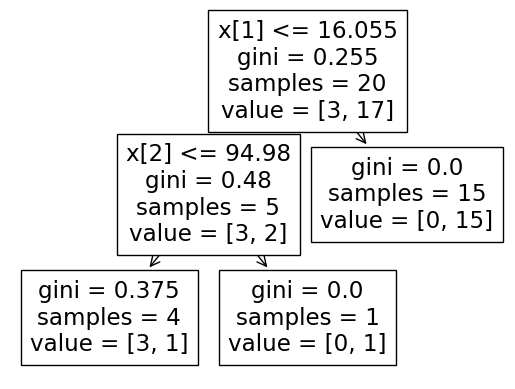

In [33]:
plot_tree(model)

>3.  Dibujar la frontera de decisión a mano o en el notebook para el árbol de la primera cv.(No se pueden usar bibliotecas que realizan automáticamente este proceso).(8 puntos)


> 4.  Corroborar los resultados con Sklearn.(2 puntos)

## **Parte 2 (25 puntos)**



Utilizando el dataset de Grades, construir un modelo de árbol de decisión con sklearn que prediga la nota final(G3) de un estudiante. Utilizar sólo las variables numéricas(seleccionar las que considere más importantes). No utilizar las columnas G1 y G2. Utilizar validación cruzada de 5. Probar con al menos 3 alturas diferentes.(Expresar resultados en términos de promedios y desviación estándar).

In [34]:
data = pd.read_csv("https://raw.githubusercontent.com/camilousa/datasets/master/school_grades_dataset.csv")

In [35]:
numeric_features =['age', 'absences', 'failures', 'studytime', 'famrel', 'freetime', 'goout', 'health']

X = data[numeric_features]
y = data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

results = []



In [36]:
tree_heights = [3, 5, 7]
for height in tree_heights:
    model = DecisionTreeRegressor(max_depth=height, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    results.append((height, rmse_scores.mean(), rmse_scores.std()))

In [37]:
print("Altura del árbol | Promedio RMSE | Desviación estándar RMSE")
print("------------------------------------------------------------")
for result in results:
    print(f"{result[0]:^16} | {result[1]:^14.3f} | {result[2]:^22.3f}")


Altura del árbol | Promedio RMSE | Desviación estándar RMSE
------------------------------------------------------------
       3         |     2.976      |         0.283         
       5         |     3.436      |         0.496         
       7         |     3.440      |         0.380         


Mejor modelo:
DecisionTreeRegressor(max_depth=3, random_state=10)
Mejor profundidad: 3
Error cuadrático medio en el conjunto de entrenamiento: 7.237977105051158
Error cuadrático medio en el conjunto de prueba: 8.81482772589823


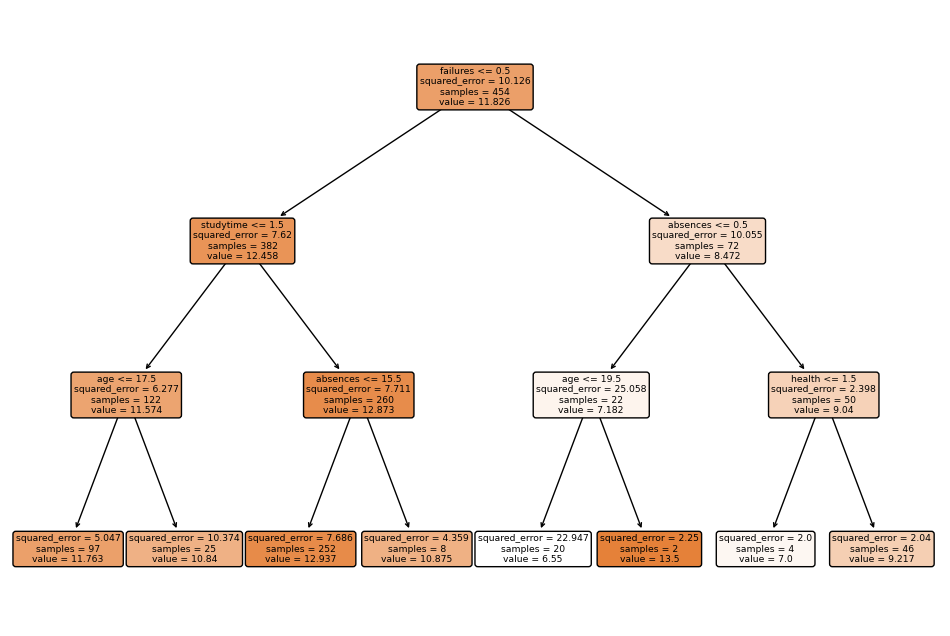

In [38]:
best_model = None
best_depth = None
best_train_score = 0
best_test_score = 0

for max_depth in tree_heights:

    model = DecisionTreeRegressor(max_depth=max_depth, random_state=10)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_score = mean_squared_error(y_train, y_train_pred)
    test_score = mean_squared_error(y_test, y_test_pred)

    if best_test_score == 0 or test_score < best_test_score:
        best_model = model
        best_depth = max_depth
        best_train_score = train_score
        best_test_score = test_score


print("Mejor modelo:")
print(best_model)
print("Mejor profundidad:", best_depth)
print("Error cuadrático medio en el conjunto de entrenamiento:", best_train_score)
print("Error cuadrático medio en el conjunto de prueba:", best_test_score)


plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=X_train.columns, filled=True, rounded=True, max_depth=best_depth)
plt.show()